 ## Fig 10. SGN counts 
 ### Set up and load data

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kendalltau

# Load data
DF_sgn = pd.read_excel('data/sgn.xlsx', sheet_name='python')
DF_sgn

,group,animal,side,deafening,implantation,perfusion,dur_deafness,SGN
0,ED-US,I1,R,0.0,51.0,579,579,14437.000
1,ED-US,I1,L,0.0,51.0,579,579,13850.000
2,ED-US,I4,R,0.0,52.0,333,333,22543.000
3,ED-US,I4,L,0.0,52.0,333,333,19886.000
4,ED-US,I5,R,0.0,94.0,419,419,11211.000
5,ED-US,I5,L,0.0,94.0,419,419,16225.000
6,AD,B63,R,434.0,434.0,519,85,21243.000
7,AD,B63,L,434.0,434.0,519,85,17401.000
8,NH,N1,R,NaN,NaN,599,0,25572.000
9,NH,N1,L,NaN,NaN,599,0,29981.000


### Plot SGN count by groups and as a function of duration of deafness

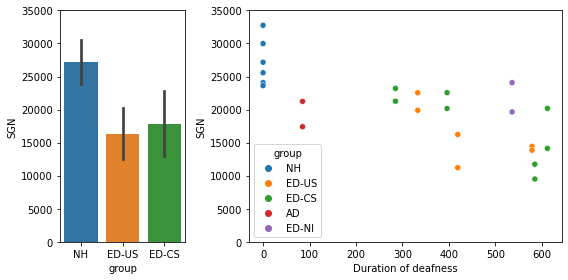

In [2]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[2, 5]))
sns.barplot(x='group', y='SGN', order=['NH', 'ED-US', 'ED-CS'],
            data=DF_sgn[(DF_sgn.group!='AD') & (DF_sgn.group!='ED-NI')], ci='sd', ax=axs[0])
axs[0].set_ylim([0, 35000])
sns.scatterplot(data=DF_sgn, x='dur_deafness', y='SGN',
                hue='group', hue_order=['NH', 'ED-US', 'ED-CS', 'AD', 'ED-NI'], ax=axs[1])
axs[1].set_ylim([0, 35000])
axs[1].set_xlabel("Duration of deafness")
f.tight_layout()

### Test if there is a correlation between duration of deafness & SGN count

In [3]:
def my_corr(DF, grp_name, x, y, plot):
    tau, p_value = kendalltau(DF[x], DF[y])
    print("Correlation between", x, "and", y, "in", grp_name)
    print("Kendall\'s tau: %0.4f" % tau)
    print("P value: %0.4f \n" % p_value)
    if plot:
        sns.relplot(data=DF, x=x, y=y, hue='animal', height=3, aspect=1.4)

my_corr(DF_sgn[DF_sgn.group!='NH'], 'AD and all ED groups', 'dur_deafness', 'SGN', False)
my_corr(DF_sgn[DF_sgn.group!=(DF_sgn.group=='ED-US') | (DF_sgn.group=='ED-CS')],
        'ED-US & ED-CS', 'dur_deafness', 'SGN', False)
my_corr(DF_sgn[DF_sgn.group=='ED-CS'], 'ED-CS', 'dur_deafness', 'SGN', False)
my_corr(DF_sgn[DF_sgn.group=='ED-US'], 'ED-US', 'dur_deafness', 'SGN', False)

Correlation between dur_deafness and SGN in AD and all ED groups
Kendall's tau: -0.3638
P value: 0.0395 

Correlation between dur_deafness and SGN in ED-US & ED-CS
Kendall's tau: -0.6067
P value: 0.0001 

Correlation between dur_deafness and SGN in ED-CS
Kendall's tau: -0.4629
P value: 0.1255 

Correlation between dur_deafness and SGN in ED-US
Kendall's tau: -0.5963
P value: 0.1120 



### Test if there is a correlation between SGN and ITD STVR
#### In ED-CS group

In [4]:
# Select best ITD STVR for each unit
DF = pd.read_csv('STVR_data.csv')
DF = DF[['group', 'animal', 'SGN', 'unit', 'deaf_dur', 'pps', 'stvr', 'pval']]
DF = DF[(DF.group=='ED-CS')]
DF

,group,animal,SGN,unit,deaf_dur,pps,stvr,pval
389,ED-CS,J6,10613.9500,J6_s06-2,221,20,0.111576,4.019290e-01
390,ED-CS,J6,10613.9500,J6_s06-2,221,40,0.155569,7.162131e-02
391,ED-CS,J6,10613.9500,J6_s06-2,221,80,0.278881,1.573179e-05
392,ED-CS,J6,10613.9500,J6_s06-2,221,160,0.000000,1.000000e+00
393,ED-CS,J6,10613.9500,J6_s06-2,221,320,0.000000,1.000000e+00
...,...,...,...,...,...,...,...,...
1014,ED-CS,J1,17155.3575,J10_s38-3,403,40,0.423574,3.241851e-14
1015,ED-CS,J1,17155.3575,J10_s38-3,403,80,0.782044,0.000000e+00
1016,ED-CS,J1,17155.3575,J10_s38-3,403,160,0.547123,0.000000e+00
1017,ED-CS,J1,17155.3575,J10_s38-3,403,320,0.112717,2.576378e-01


Correlation between SGN and stvr in ED-CS
Kendall's tau: 0.0943
P value: 0.2091 



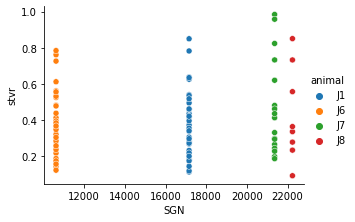

In [5]:
DF_unit = DF.groupby(['group','animal','unit']).max()
DF_unit.reset_index(inplace=True)
my_corr(DF_unit, 'ED-CS', 'SGN', 'stvr', True)

No correlation looking at max STVR for each unit.

Correlation between SGN and stvr in ED-CS
Kendall's tau: 0.0814
P value: 0.0076 



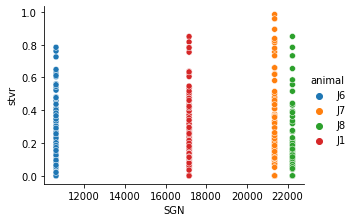

In [6]:
my_corr(DF, 'ED-CS', 'SGN', 'stvr', True)

When tested over STVR values from all pulse rate tested, there is a weak but significant positive correaltion.

#### Correlation between SGN count and ITD STVR in ED-US group

Correlation between SGN and stvr in ED-US
Kendall's tau: -0.0875
P value: 0.0271 



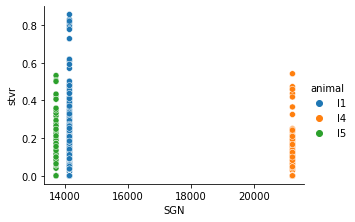

In [7]:
DF = pd.read_csv('STVR_data.csv')
DF = DF[['group', 'animal', 'SGN', 'unit', 'deaf_dur', 'pps', 'stvr', 'pval']]
DF = DF[(DF.group=='ED-US')]
my_corr(DF, 'ED-US', 'SGN', 'stvr', True)

Negative correlation found in this group. This result is primarily driven by I4. 